In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
grouped = data.groupby(['MaritalDesc', 'Sex'])
result = grouped['Salary'].agg(['min', 'median', 'max', 'mean'])
result = result.rename(columns={'min': 'min_salary',
                                'median': 'median_salary',
                                'max': 'max_salary',
                                'mean': 'average_salary'})
result = result.reset_index()
result = result.set_index(['MaritalDesc', 'Sex'])
formatted_output = result.to_string()
print(formatted_output)

                 min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000


2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
termination_counts = data['TermReason'].value_counts().reset_index()
termination_counts.columns = ['TermReason', 'total_termination']
top_5_termination_reasons = termination_counts.head(5)
print(top_5_termination_reasons)

          TermReason  total_termination
0  N/A-StillEmployed                207
1   Another position                 20
2            unhappy                 14
3         more money                 11
4      career change                  9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
filtered_data = data[data['PerformanceScore'] == 'Exceeds']
employee_count_by_source = filtered_data.groupby('RecruitmentSource')['Employee_Name'].count().reset_index()
employee_count_by_source.columns = ['RecruitmentSource', 'total_recruit']
sorted_result = employee_count_by_source.sort_values(by='total_recruit', ascending=False)
print(sorted_result)

    RecruitmentSource  total_recruit
4              Indeed             12
5            LinkedIn              9
1  Diversity Job Fair              6
2   Employee Referral              5
0       CareerBuilder              2
3       Google Search              2
6             Website              1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
manager_count_by_department = data.groupby('Department')['ManagerName'].nunique().reset_index()
manager_count_by_department.columns = ['Department', 'ManagerCount']
print(manager_count_by_department)

             Department  ManagerCount
0         Admin Offices             3
1      Executive Office             1
2                 IT/IS             6
3     Production                   10
4                 Sales             4
5  Software Engineering             3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
termination_ratio_by_gender = data.groupby('Sex')['Termd'].value_counts(normalize=True)
print(termination_ratio_by_gender)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64


# Create an EDA and Data Visualization Question

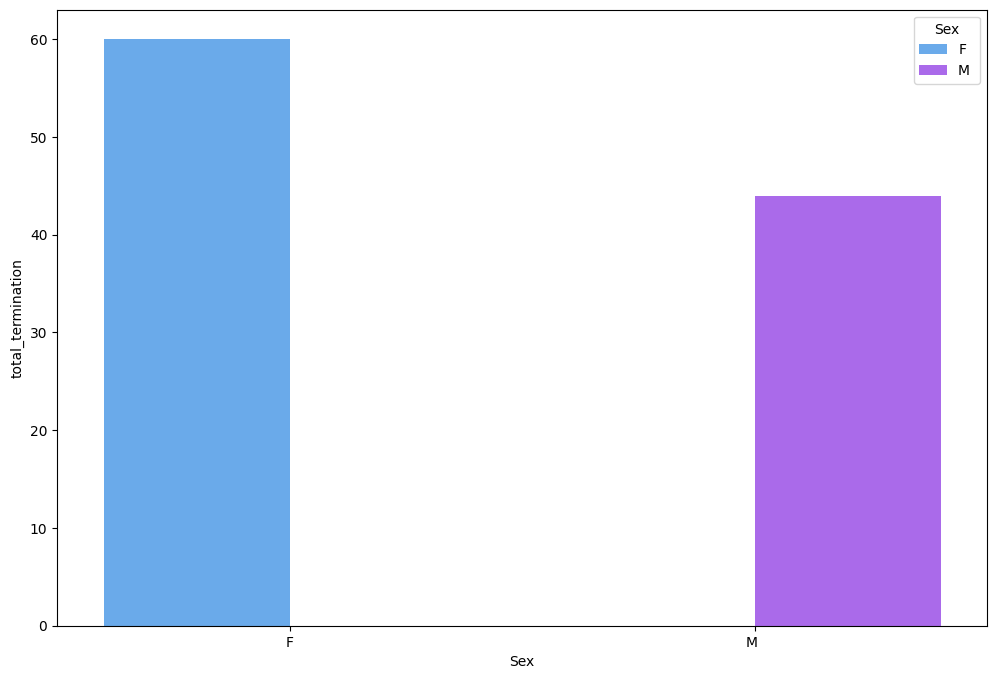

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

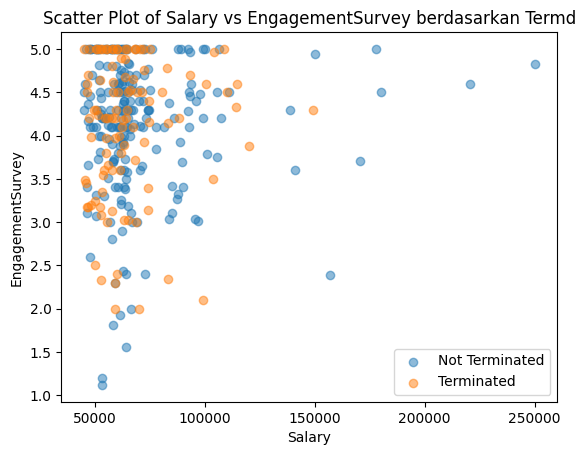

In [ ]:
not_terminated = data[data['Termd'] == 0]
terminated = data[data['Termd'] == 1]

plt.scatter(not_terminated['Salary'], not_terminated['EngagementSurvey'], label='Not Terminated', alpha=0.5)
plt.scatter(terminated['Salary'], terminated['EngagementSurvey'], label='Terminated', alpha=0.5)

plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')
plt.title('Scatter Plot of Salary vs EngagementSurvey berdasarkan Termd')
plt.legend()
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

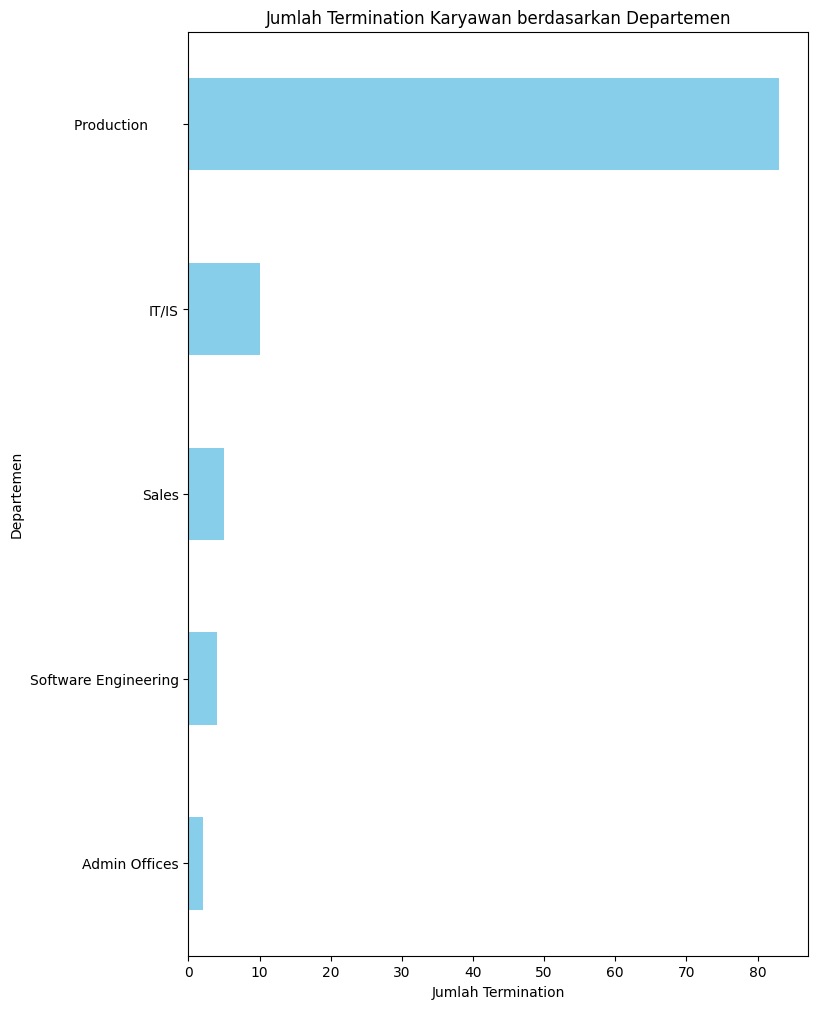

In [ ]:
termination_by_department = data[data['Termd'] == 1]['Department'].value_counts()
termination_by_department = termination_by_department.sort_values(ascending=True)

plt.figure(figsize=(8, 12))
termination_by_department.plot(kind='barh', color='skyblue')
plt.title('Jumlah Termination Karyawan berdasarkan Departemen')
plt.xlabel('Jumlah Termination')
plt.ylabel('Departemen')
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

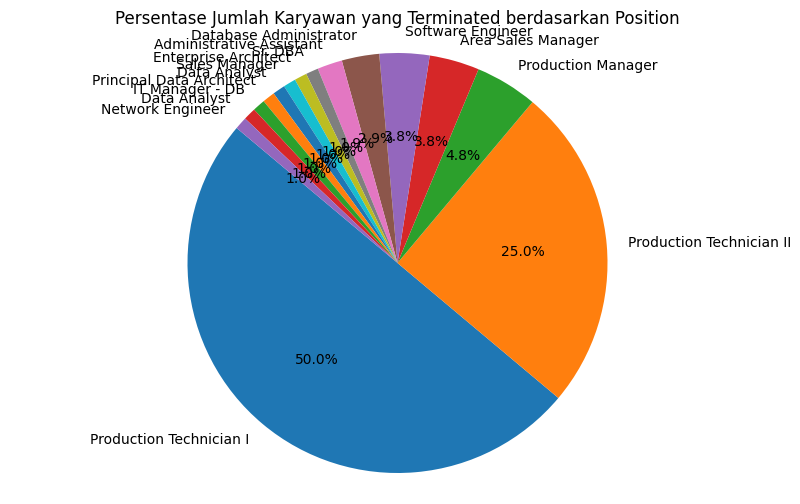

In [ ]:
terminated_data = data[data['Termd'] == 1]
terminated_by_position = terminated_data['Position'].value_counts()

labels = terminated_by_position.index
sizes = terminated_by_position.values

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Jumlah Karyawan yang Terminated berdasarkan Position')
plt.axis('equal')

plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

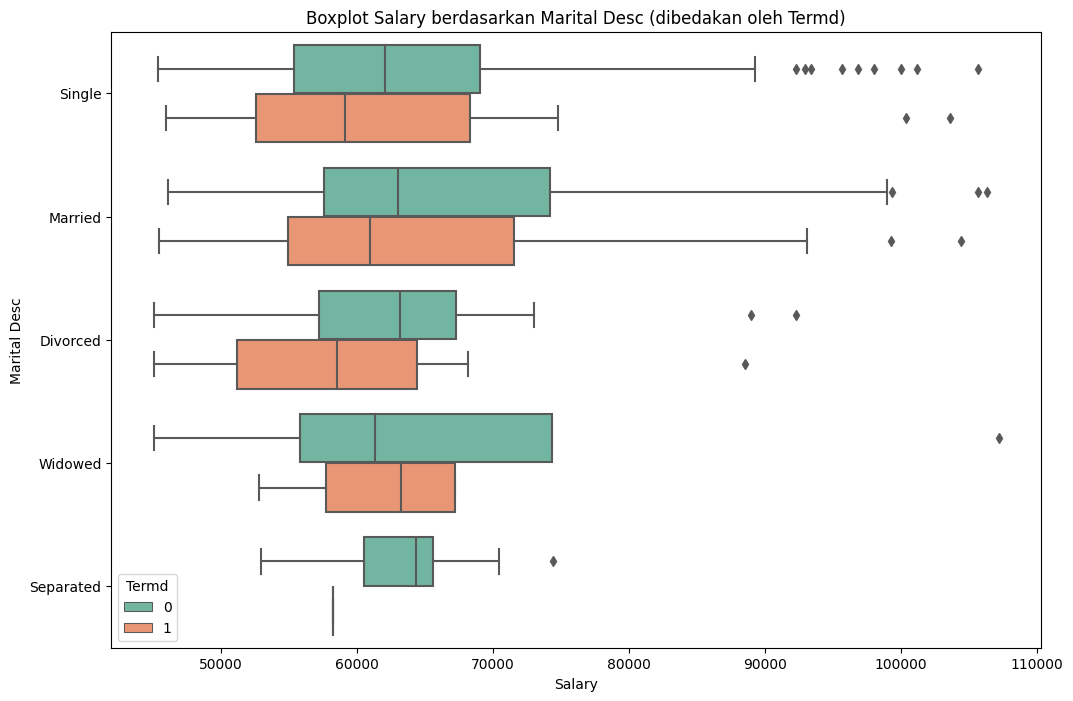

In [ ]:
filtered_data = data[data['Salary'] < data['Salary'].quantile(0.95)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Salary', y='MaritalDesc', hue='Termd', data=filtered_data, palette='Set2', orient='h')
plt.title('Boxplot Salary berdasarkan Marital Desc (dibedakan oleh Termd)')
plt.xlabel('Salary')
plt.ylabel('Marital Desc')
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


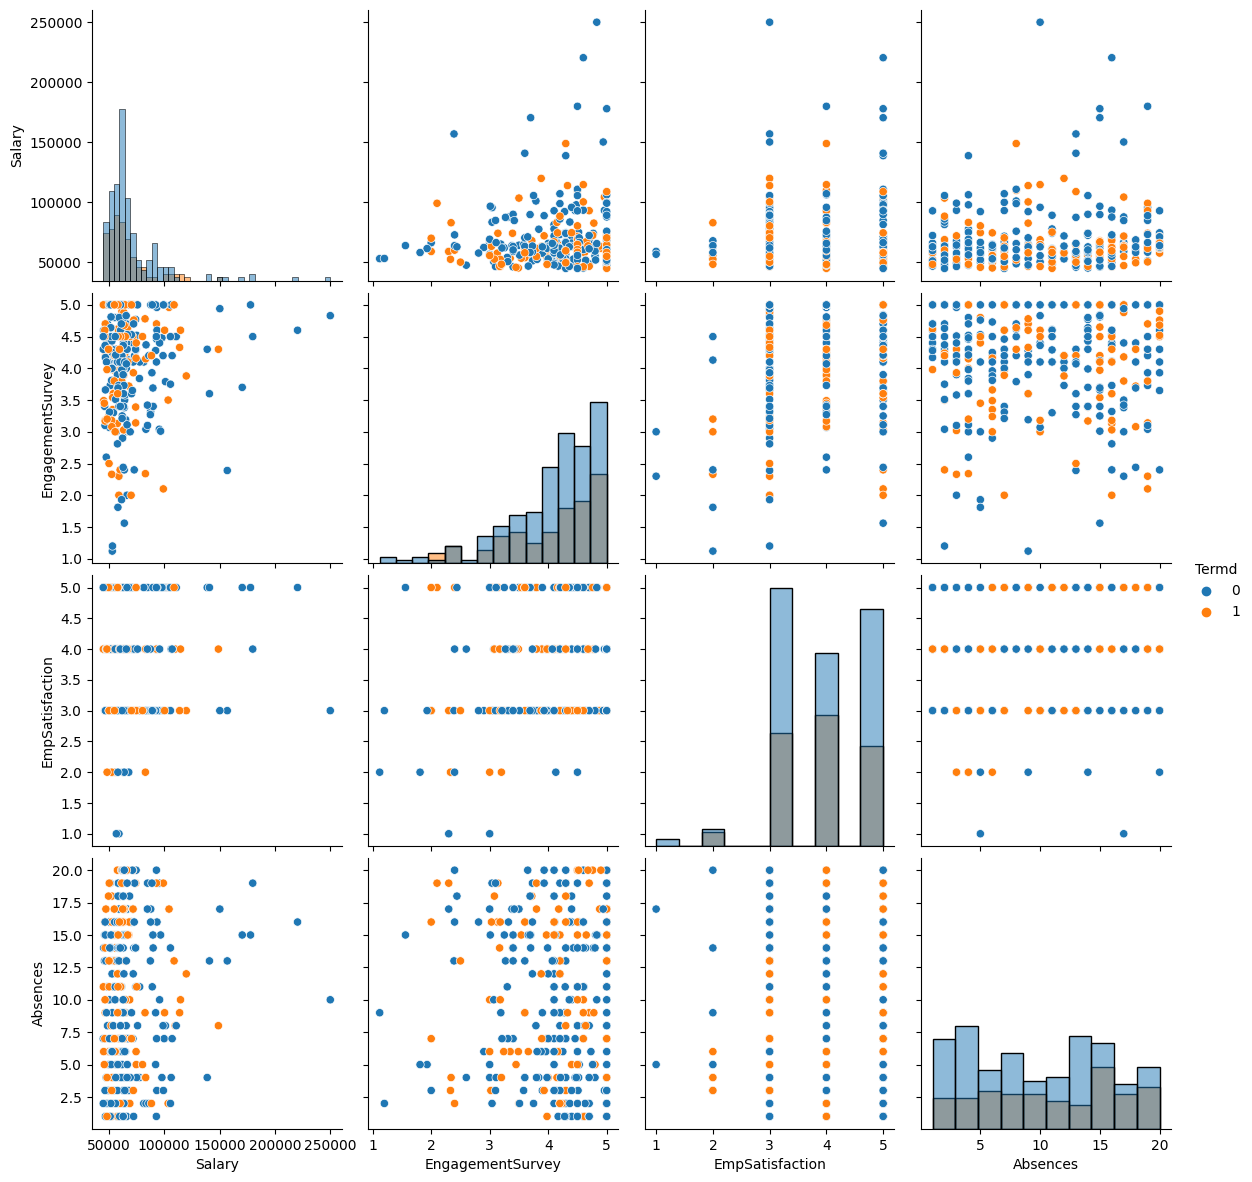

In [ ]:

print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
data['DOB_date'] = pd.to_datetime(data['DOB'], format='%m/%d/%y')

data['Age'] = 2022 - data['DOB_date'].dt.year

result = data[['DOB', 'DOB_date', 'Age']]
print(result)

          DOB   DOB_date  Age
0    07/10/83 1983-07-10   39
1    05/05/75 1975-05-05   47
2    09/19/88 1988-09-19   34
3    09/27/88 1988-09-27   34
4    09/08/89 1989-09-08   33
..        ...        ...  ...
306  05/11/85 1985-05-11   37
307  05/04/82 1982-05-04   40
308  08/30/79 1979-08-30   43
309  02/24/79 1979-02-24   43
310  08/17/78 1978-08-17   44

[311 rows x 3 columns]


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['Salary_minmax'] = scaler.fit_transform(data[['Salary']])

result = data[['Salary', 'Salary_minmax']]
print(result)


     Salary  Salary_minmax
0     62506       0.085190
1    104437       0.289777
2     64955       0.097139
3     64991       0.097315
4     50825       0.028197
..      ...            ...
306   65893       0.101716
307   48513       0.016916
308  220450       0.855821
309   89292       0.215883
310   45046       0.000000

[311 rows x 2 columns]


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].astype('category')

print(data.dtypes)


Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#Setelah diubah category

In [ ]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['RecruitmentSource'] = label_encoder.fit_transform(data['RecruitmentSource'])
data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])

print(data.dtypes)



Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#jawaban no, 16
#Dependent Variable (Target)
y = data['Termd']
y.head(5)

#Independent Variable (Feature)
x = data
x.drop(['Termd'], axis=1)
x['DOB_Date']=pd.to_datetime(x['DOB'])
x['Age'] = 2022 - x['DOB_Date'].dt.year
Salary = x['Salary'].to_numpy()
salary = Salary.reshape(-1,1)
scaler = MinMaxScaler()
hasil_scale = scaler.fit_transform(salary)
x['Salary_minmax']=hasil_scale
x = x[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PositionID', 'Age', 'RecruitmentSource', 'PerformanceScore', 'Salary_minmax', 'Absences', 'SpecialProjectsCount', 'EmpSatisfaction', 'EngagementSurvey']]
x.head(5)

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol=0.00001, C=1, max_iter=1000, penalty =None)
train_model = model.fit(x_train, y_train)
y_pred = train_model.predict(x_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Accuracy : %.2f%%" % (accuracy * 100.0))
print("Precision : %.2f%%" % (precision* 100.0))
print("Recall : %.2f%%" % (recall * 100.0))


Accuracy : 71.43%
Precision : 64.29%
Recall : 40.91%


In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol=0.00001, C=1, max_iter=1000, penalty ='none')
train_model = model.fit()





TypeError: ignored

# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 47.6% of the points cannot be plac

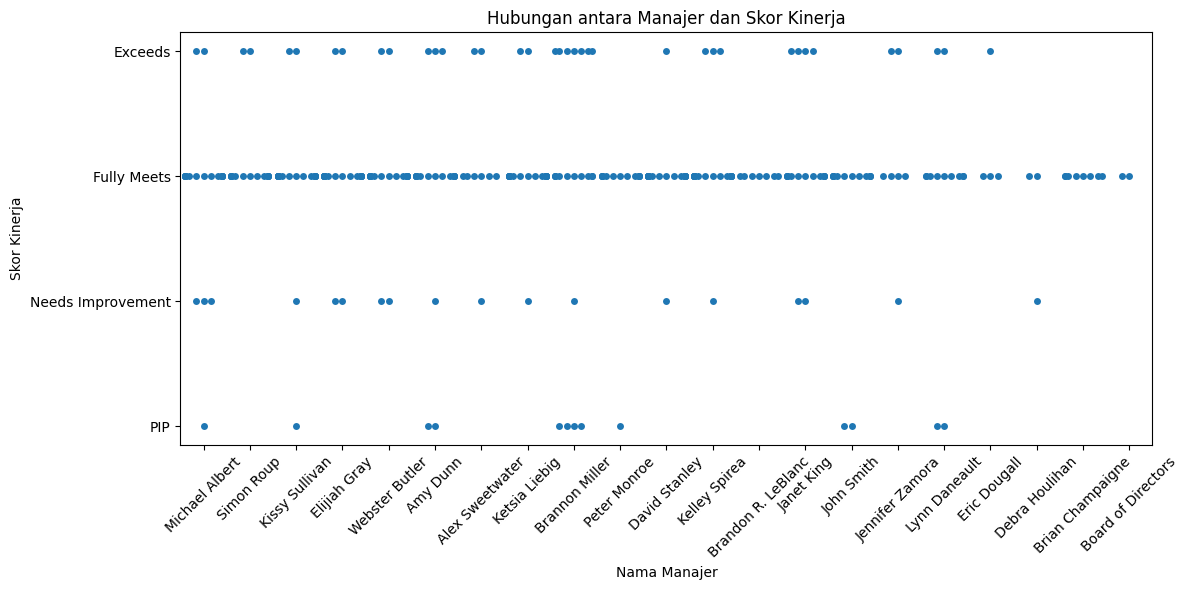

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
#Menampilkan hubungan antara manajer dan skor kinerja menggunakan swarmplot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='ManagerName', y='PerformanceScore', data=df)
plt.xticks(rotation=45)
plt.title("Hubungan antara Manajer dan Skor Kinerja")
plt.xlabel("Nama Manajer")
plt.ylabel("Skor Kinerja")
plt.tight_layout()
plt.show()

19.ya, jika ada manajer yang memiliki titik-titik bergerombol di skor kinerja tertentu, ini mungkin menunjukkan bahwa manajer tersebut cenderung memberikan nilai yang serupa kepada banyak karyawannya. sebaliknya,Sebaliknya, jika terdapat sebaran titik yang lebih merata di sepanjang sumbu-Y di bawah satu manajer, ini mungkin menunjukkan variasi dalam skor kinerja yang lebih besar di bawah manajer tersebut.






---




In [ ]:
import pandas as pd
from scipy import stats

# Membaca dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Mengonversi kolom "PerformanceScore" menjadi bentuk numerik
performance_mapping = {
    'Exceeds': 5,
    'Fully Meets': 4,
    'Needs Improvement': 3,
    'PIP': 2,
    'N/A- too early to review': 1,
}

data['PerformanceScore'] = data['PerformanceScore'].map(performance_mapping)


# Menghitung skor kinerja rata-rata untuk setiap manajer
manager_performance = data.groupby('ManagerName')['PerformanceScore'].mean()

# Menggunakan uji t independen untuk memeriksa apakah ada perbedaan yang signifikan dalam skor kinerja antara manajer
managers = data['ManagerName'].unique()
p_values = []

for manager in managers:
    group1 = data[data['ManagerName'] == manager]['PerformanceScore']
    group2 = data[data['ManagerName'] != manager]['PerformanceScore']
    _, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    p_values.append(p_value)

# Membuat DataFrame untuk hasil uji t
results = pd.DataFrame({'ManagerName': managers, 'P-Value': p_values})

# Menampilkan hasil uji t
results

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,ManagerName,P-Value
0,Michael Albert,0.392291
1,Simon Roup,0.104989
2,Kissy Sullivan,0.848016
3,Elijiah Gray,0.809422
4,Webster Butler,0.817779
5,Amy Dunn,0.652899
6,Alex Sweetwater,0.516257
7,Ketsia Liebig,0.415276
8,Brannon Miller,0.751192
9,Peter Monroe,0.404879
